In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


from code.evaluation import (compute_horizon_degradation_metrics,
                             plot_forecast_degradation,
                             plot_selected_horizons,
                             plot_forecast_trajectory,
                             compute_forecast_metrics)

from code.data_utils import clean_actual_data, clean_forecast_data

In [2]:
def plot_time_series(df, value_col='load', time_col='timestamp',title='Time Series Plot'):
    """
    Plots a time series using matplotlib.

    Parameters:
    - df: pandas DataFrame with at least two columns.
    - time_col: name of the column with datetime values.
    - value_col: name of the column with the values to plot.
    - title: title of the plot.
    """
    plt.figure(figsize=(12, 5))
    plt.plot(df[time_col], df[value_col], label=value_col, color='tab:blue')
    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.ylabel(value_col.capitalize())
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [3]:
def correct_data(df):
    """
    Corrects the data by removing outliers and interpolating missing values.

    Parameters:
    - df: pandas DataFrame with at least two columns: 'timestamp' and 'load'.

    Returns:
    - df: corrected pandas DataFrame.
    """
    # Remove outliers
    df['load_diff'] = df['load'].diff(periods=1)
    outlier_idx = df['load_diff'].abs().idxmax()
    df.loc[outlier_idx-2:outlier_idx+2, 'load'] = None
    df['load'] = df['load'].interpolate(method='linear')

    return df

In [4]:
df = pd.read_csv(r'../../data/processed/actual_load.csv', parse_dates=['timestamp'])
forecast_df = pd.read_csv(r'../../data/processed/forecast_load.csv', parse_dates=['issued_at', 'target_time'])

In [5]:
df = correct_data(df)
df['load_diff'] = df['load'].diff(periods=1)
df = df.dropna(subset=['load_diff'])

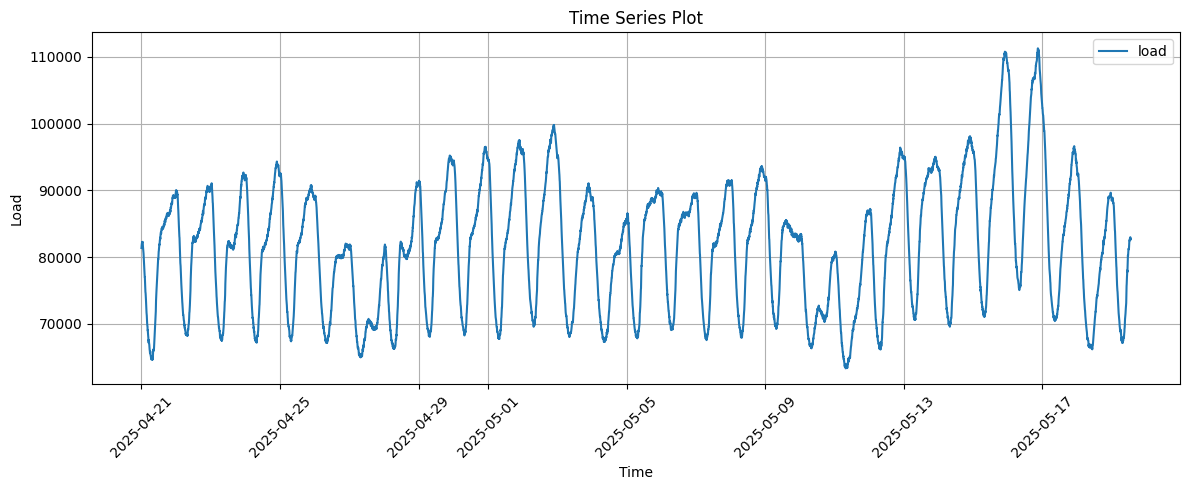

In [6]:
plot_time_series(df)

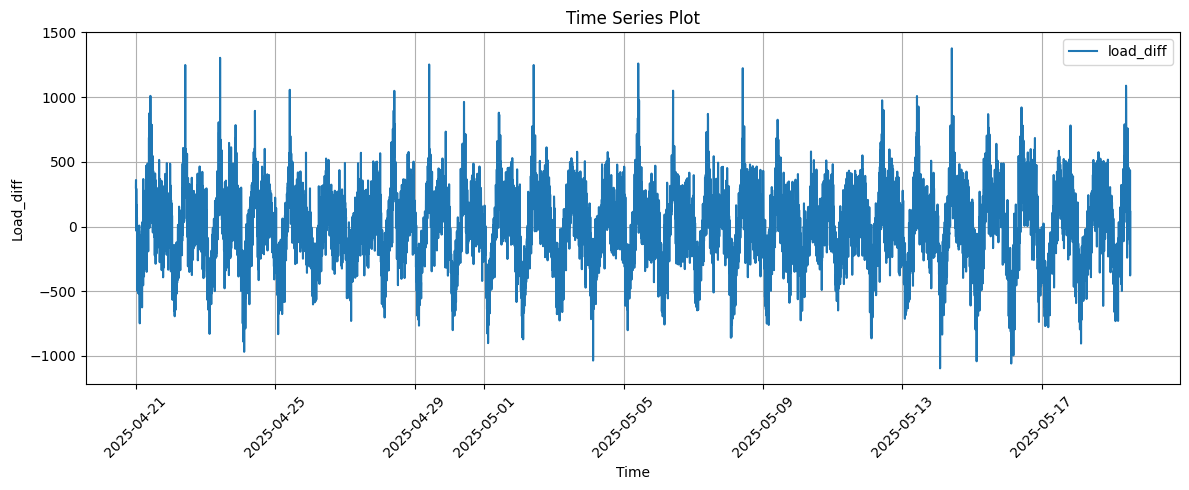

In [7]:
plot_time_series(df, value_col='load_diff')

In [8]:
result = adfuller(df['load'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -10.47443769982952
p-value: 1.259695084646028e-18
Critical Values: {'1%': np.float64(-3.4311494809048115), '5%': np.float64(-2.861893314357797), '10%': np.float64(-2.566958064448129)}


In [9]:
result = adfuller(df['load_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -10.595526542240252
p-value: 6.364437479760594e-19
Critical Values: {'1%': np.float64(-3.4311487972899553), '5%': np.float64(-2.8618930122886956), '10%': np.float64(-2.5669579036538193)}


In [10]:
df['load_bc'], lambda_ = boxcox(df['load'])

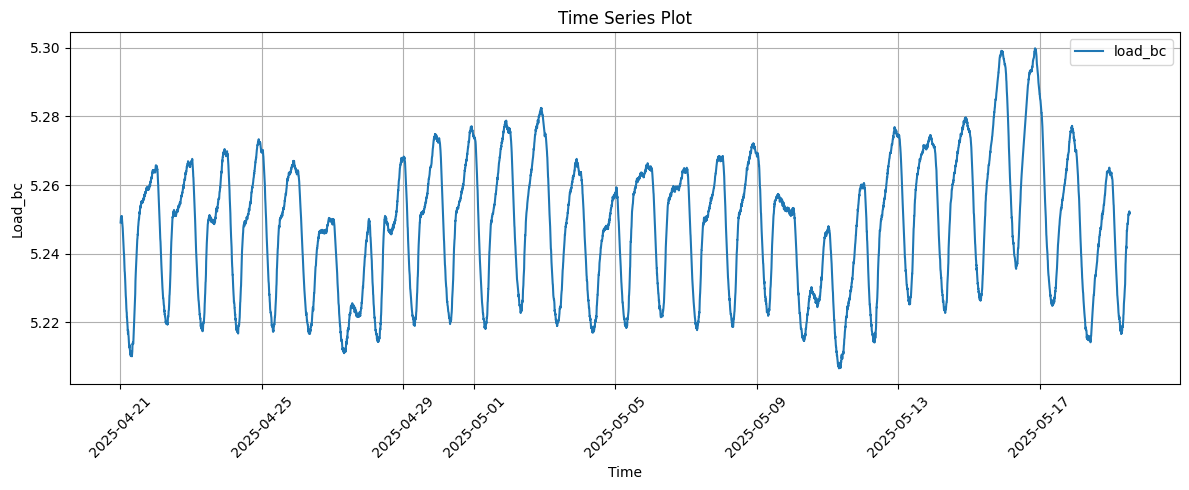

In [11]:
plot_time_series(df, value_col='load_bc')

In [12]:
lambda_

np.float64(-0.1589171584229355)

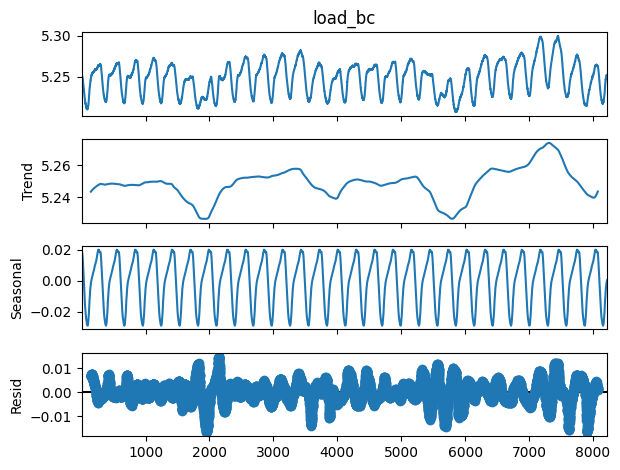

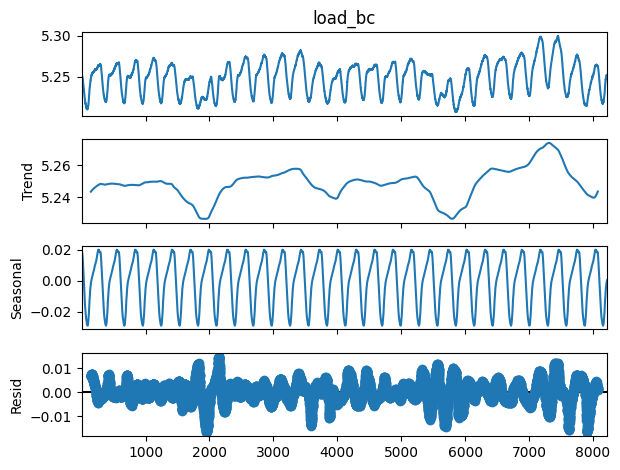

In [13]:
seasonal_decompose(df['load_bc'], model='additive', period=288).plot()

In [14]:
# see  datat types of my df
df.dtypes

timestamp    datetime64[ns]
load                float64
load_diff           float64
load_bc             float64
dtype: object

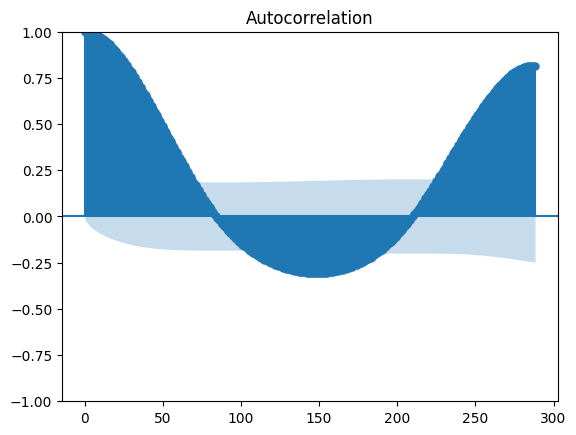

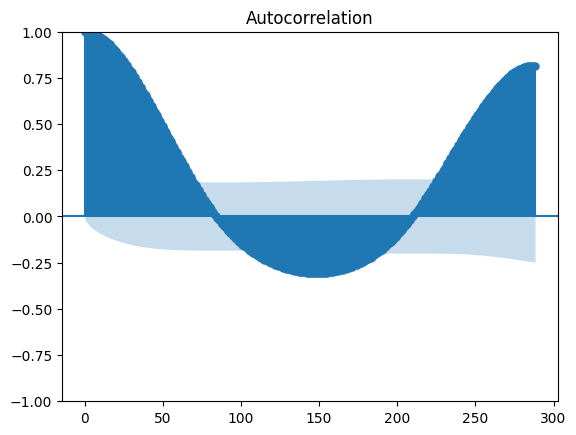

In [23]:
plot_acf(df['load_bc'], lags=288)

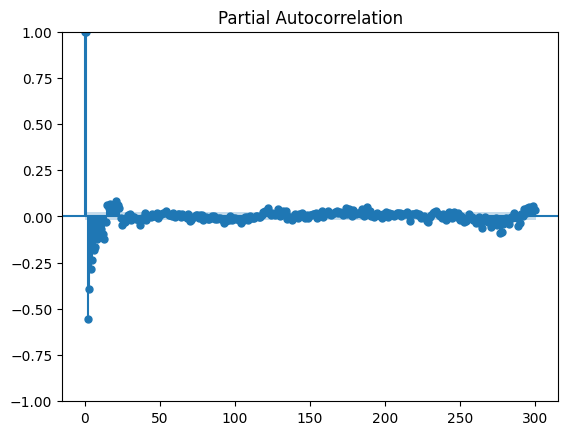

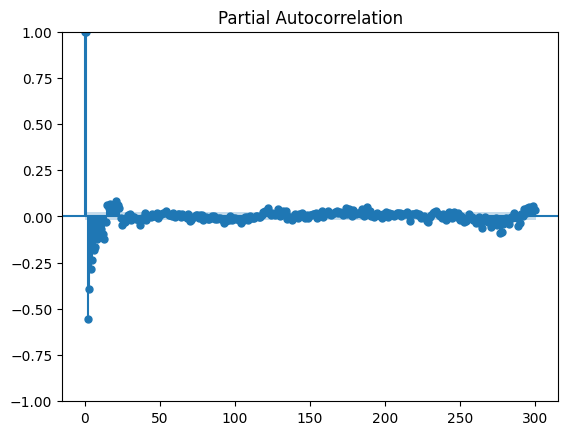

In [36]:
plot_pacf(df['load_bc'], lags=300)